In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [26]:
# Define the MLP architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.bn = nn.BatchNorm1d(512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.bn(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [27]:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader  = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader   = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)


In [28]:
# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


In [29]:
num_epochs = 20

# Lists to store loss and accuracy
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * labels.size(0)
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    
    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    test_losses.append(epoch_loss)
    test_accuracies.append(epoch_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, '
          f'Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.2f}%')


Epoch [1/20], Train Loss: 0.2067, Train Acc: 93.86%, Test Loss: 0.0985, Test Acc: 97.15%
Epoch [2/20], Train Loss: 0.0762, Train Acc: 97.68%, Test Loss: 0.0731, Test Acc: 97.71%
Epoch [3/20], Train Loss: 0.0482, Train Acc: 98.51%, Test Loss: 0.0702, Test Acc: 97.66%
Epoch [4/20], Train Loss: 0.0313, Train Acc: 99.12%, Test Loss: 0.0666, Test Acc: 97.87%
Epoch [5/20], Train Loss: 0.0209, Train Acc: 99.40%, Test Loss: 0.0599, Test Acc: 98.17%
Epoch [6/20], Train Loss: 0.0131, Train Acc: 99.66%, Test Loss: 0.0543, Test Acc: 98.43%
Epoch [7/20], Train Loss: 0.0090, Train Acc: 99.79%, Test Loss: 0.0588, Test Acc: 98.26%
Epoch [8/20], Train Loss: 0.0058, Train Acc: 99.90%, Test Loss: 0.0556, Test Acc: 98.49%
Epoch [9/20], Train Loss: 0.0037, Train Acc: 99.95%, Test Loss: 0.0560, Test Acc: 98.35%
Epoch [10/20], Train Loss: 0.0023, Train Acc: 99.98%, Test Loss: 0.0529, Test Acc: 98.46%
Epoch [11/20], Train Loss: 0.0015, Train Acc: 99.99%, Test Loss: 0.0544, Test Acc: 98.57%
Epoch [12/20], Trai

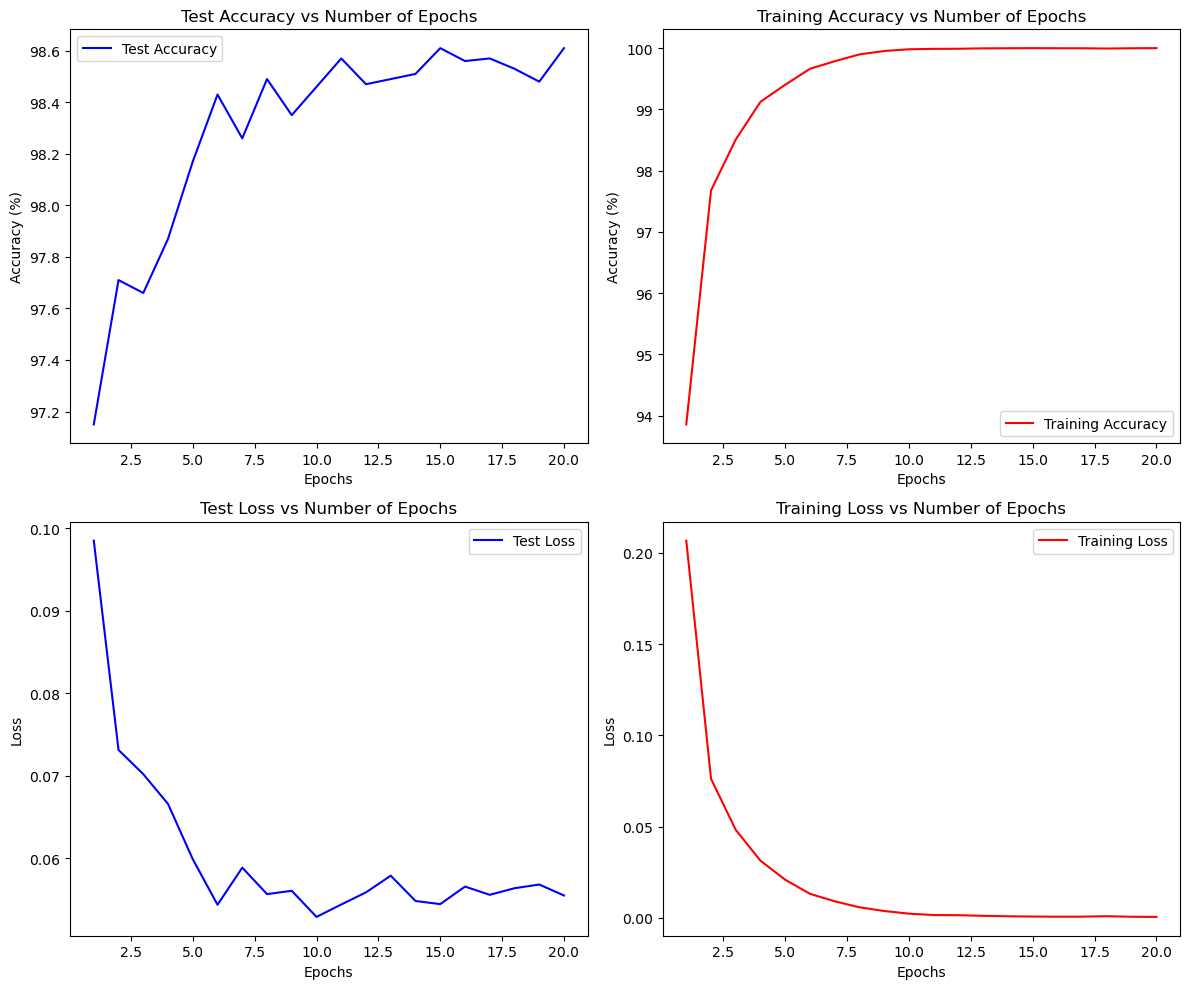

In [30]:
# Plotting the results
epochs = range(1, num_epochs+1)

plt.figure(figsize=(12,10))

# (a) Test Accuracy vs Number of Epochs
plt.subplot(2,2,1)
plt.plot(epochs, test_accuracies, 'b', label='Test Accuracy')
plt.title('Test Accuracy vs Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# (b) Training Accuracy vs Number of Epochs
plt.subplot(2,2,2)
plt.plot(epochs, train_accuracies, 'r', label='Training Accuracy')
plt.title('Training Accuracy vs Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# (c) Test Loss vs Number of Epochs
plt.subplot(2,2,3)
plt.plot(epochs, test_losses, 'b', label='Test Loss')
plt.title('Test Loss vs Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# (d) Training Loss vs Number of Epochs
plt.subplot(2,2,4)
plt.plot(epochs, train_losses, 'r', label='Training Loss')
plt.title('Training Loss vs Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 4. MLP with an axtra layer

In [31]:
# Define the updated MLP architecture
class MLP_extra_layer(nn.Module):
    def __init__(self):
        super(MLP_extra_layer, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.bn1(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.bn2(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

In [32]:
# Initialize the model, loss function, and optimizer
model = MLP_extra_layer()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [33]:
num_epochs = 20

# Lists to store loss and accuracy
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * labels.size(0)
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    
    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    test_losses.append(epoch_loss)
    test_accuracies.append(epoch_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, '
          f'Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.2f}%')


Epoch [1/20], Train Loss: 0.1915, Train Acc: 94.23%, Test Loss: 0.1123, Test Acc: 96.59%
Epoch [2/20], Train Loss: 0.0709, Train Acc: 97.80%, Test Loss: 0.0627, Test Acc: 98.02%
Epoch [3/20], Train Loss: 0.0415, Train Acc: 98.67%, Test Loss: 0.0595, Test Acc: 98.18%
Epoch [4/20], Train Loss: 0.0290, Train Acc: 99.09%, Test Loss: 0.0604, Test Acc: 98.15%
Epoch [5/20], Train Loss: 0.0205, Train Acc: 99.35%, Test Loss: 0.0557, Test Acc: 98.41%
Epoch [6/20], Train Loss: 0.0130, Train Acc: 99.63%, Test Loss: 0.0609, Test Acc: 98.16%
Epoch [7/20], Train Loss: 0.0100, Train Acc: 99.73%, Test Loss: 0.0534, Test Acc: 98.41%
Epoch [8/20], Train Loss: 0.0068, Train Acc: 99.82%, Test Loss: 0.0558, Test Acc: 98.46%
Epoch [9/20], Train Loss: 0.0044, Train Acc: 99.91%, Test Loss: 0.0539, Test Acc: 98.47%
Epoch [10/20], Train Loss: 0.0032, Train Acc: 99.93%, Test Loss: 0.0564, Test Acc: 98.48%
Epoch [11/20], Train Loss: 0.0026, Train Acc: 99.95%, Test Loss: 0.0507, Test Acc: 98.52%
Epoch [12/20], Trai

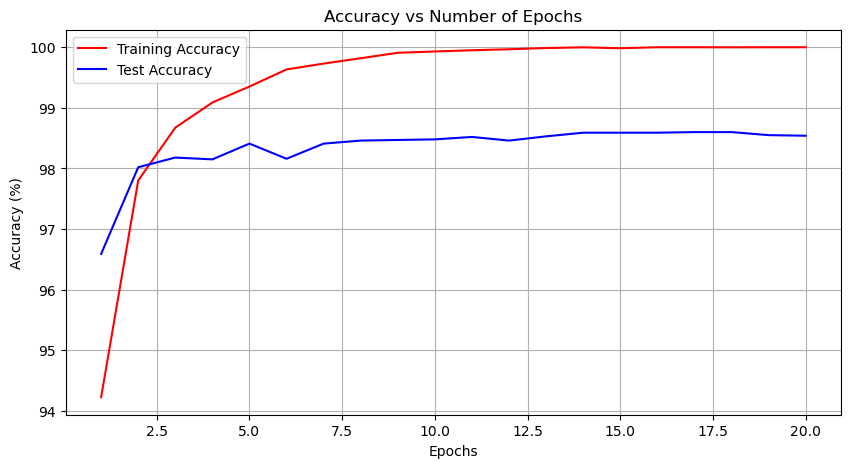

In [35]:
# Plotting the results
epochs = range(1, num_epochs+1)

plt.figure(figsize=(10,5))

# Plot Test Accuracy and Training Accuracy vs Number of Epochs
plt.plot(epochs, train_accuracies, 'r', label='Training Accuracy')
plt.plot(epochs, test_accuracies, 'b', label='Test Accuracy')
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()